### Importing Libraries and Dataset

In [2]:
import pandas as pd
from prophet import Prophet
import plotly.express as px

In [3]:
data = pd.read_csv("dataset.csv")

In [4]:
columns_to_convert = ['Close/Last', 'Open', 'High', 'Low']
for column in columns_to_convert:
    data[column] = data[column].replace('[\$,]', '', regex=True).astype(float)

# Convert 'Volume' to integer
data['Volume'] = data['Volume'].astype(int)

print(data.dtypes)

Date           object
Close/Last    float64
Volume          int32
Open          float64
High          float64
Low           float64
dtype: object


<>:3: SyntaxWarning: invalid escape sequence '\$'
<>:3: SyntaxWarning: invalid escape sequence '\$'
C:\Users\Krishnansh verma\AppData\Local\Temp\ipykernel_8524\1088731643.py:3: SyntaxWarning: invalid escape sequence '\$'
  data[column] = data[column].replace('[\$,]', '', regex=True).astype(float)


In [5]:
data.head()

,Date,Close/Last,Volume,Open,High,Low
0,01/10/2025,394.74,62287330,391.40,399.2800,377.29
1,01/08/2025,394.94,73038810,392.95,402.4999,387.40
2,01/07/2025,394.36,75699530,405.83,414.3300,390.00
3,01/06/2025,411.05,85516530,423.20,426.4300,401.70
4,01/03/2025,410.44,95423330,381.48,411.8799,379.45


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        251 non-null    object 
 1   Close/Last  251 non-null    float64
 2   Volume      251 non-null    int32  
 3   Open        251 non-null    float64
 4   High        251 non-null    float64
 5   Low         251 non-null    float64
dtypes: float64(4), int32(1), object(1)
memory usage: 10.9+ KB


### Using Plotly for Visualisation

In [7]:
px.area(data, x ="Date",y="Close/Last",width= 1300, height=500)

In [8]:
px.line(data, x ="Date",y="Close/Last",width= 1300, height=500)

In [9]:
px.area(data, x="Date",y = "Volume",width= 1300, height=500)

In [10]:
px.bar(data,y = "Volume")

In [11]:
px.box(data,x = "Close/Last")

### Data Preperation

In [12]:
data.head()

,Date,Close/Last,Volume,Open,High,Low
0,01/10/2025,394.74,62287330,391.40,399.2800,377.29
1,01/08/2025,394.94,73038810,392.95,402.4999,387.40
2,01/07/2025,394.36,75699530,405.83,414.3300,390.00
3,01/06/2025,411.05,85516530,423.20,426.4300,401.70
4,01/03/2025,410.44,95423330,381.48,411.8799,379.45


In [16]:
new_data = pd.DataFrame(data = data,columns = ["Date","Close/Last"])
new_data.head()

,Date,Close/Last
0,01/10/2025,394.74
1,01/08/2025,394.94
2,01/07/2025,394.36
3,01/06/2025,411.05
4,01/03/2025,410.44


facebook prophet understands date as ds and predicting column as y

In [17]:
prophet_df = new_data.rename(columns = {'Date':"ds","Close/Last":"y"})

In [18]:
prophet_df.head()

,ds,y
0,01/10/2025,394.74
1,01/08/2025,394.94
2,01/07/2025,394.36
3,01/06/2025,411.05
4,01/03/2025,410.44


### Creating facebook prophet model

In [19]:
n = Prophet()
n.fit(prophet_df)

16:27:53 - cmdstanpy - INFO - Chain [1] start processing
16:27:54 - cmdstanpy - INFO - Chain [1] done processing


### Forecasting based on the model

In [20]:
future = n.make_future_dataframe(periods=30)
forecast = n.predict(future)

In [27]:
forecast.head(-1)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2024-01-11,206.058122,174.201832,229.014587,206.058122,206.058122,-4.541889,-4.541889,-4.541889,-4.541889,-4.541889,-4.541889,0.0,0.0,0.0,201.516233
1,2024-01-12,205.715765,172.547305,228.079682,205.715765,205.715765,-4.701257,-4.701257,-4.701257,-4.701257,-4.701257,-4.701257,0.0,0.0,0.0,201.014508
2,2024-01-16,204.346337,173.234922,229.471745,204.346337,204.346337,-3.430150,-3.430150,-3.430150,-3.430150,-3.430150,-3.430150,0.0,0.0,0.0,200.916186
3,2024-01-17,204.003980,171.682850,226.365953,204.003980,204.003980,-4.496481,-4.496481,-4.496481,-4.496481,-4.496481,-4.496481,0.0,0.0,0.0,199.507499
4,2024-01-18,203.661622,169.888805,225.601735,203.661622,203.661622,-4.541889,-4.541889,-4.541889,-4.541889,-4.541889,-4.541889,0.0,0.0,0.0,199.119733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,2025-02-04,515.571128,483.543895,538.961859,512.531136,518.991068,-3.430150,-3.430150,-3.430150,-3.430150,-3.430150,-3.430150,0.0,0.0,0.0,512.140977
276,2025-02-05,517.958075,486.203117,542.926884,514.712050,521.576720,-4.496481,-4.496481,-4.496481,-4.496481,-4.496481,-4.496481,0.0,0.0,0.0,513.461594
277,2025-02-06,520.345022,488.502646,543.720798,516.899535,524.268705,-4.541889,-4.541889,-4.541889,-4.541889,-4.541889,-4.541889,0.0,0.0,0.0,515.803133
278,2025-02-07,522.731969,489.910208,546.575798,519.066844,526.976547,-4.701257,-4.701257,-4.701257,-4.701257,-4.701257,-4.701257,0.0,0.0,0.0,518.030712


In [23]:
px.line(forecast,x='ds',y='yhat')

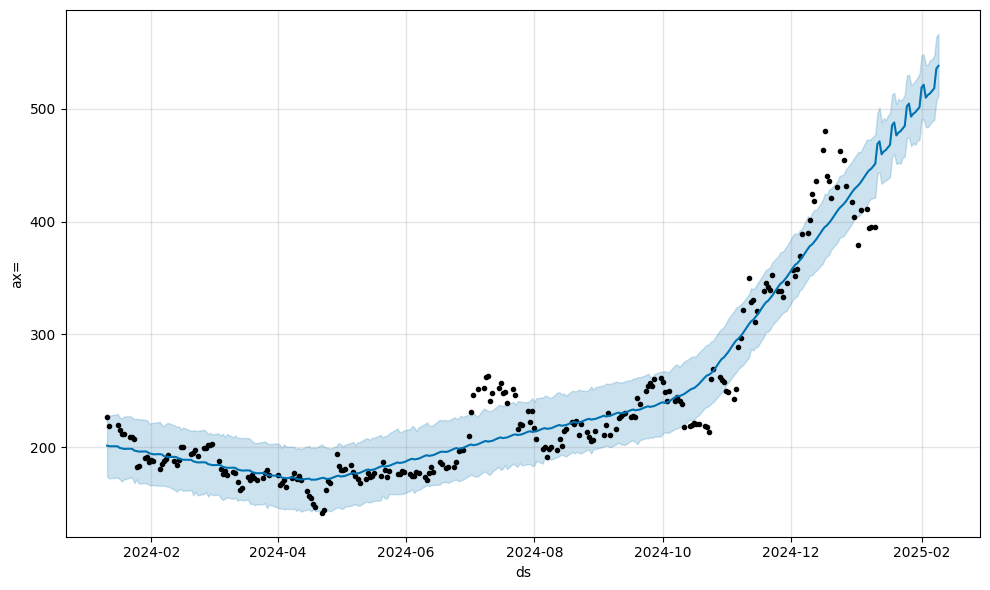

In [24]:
figure = n.plot(forecast,xlabel='ds',ylabel = 'ax=')

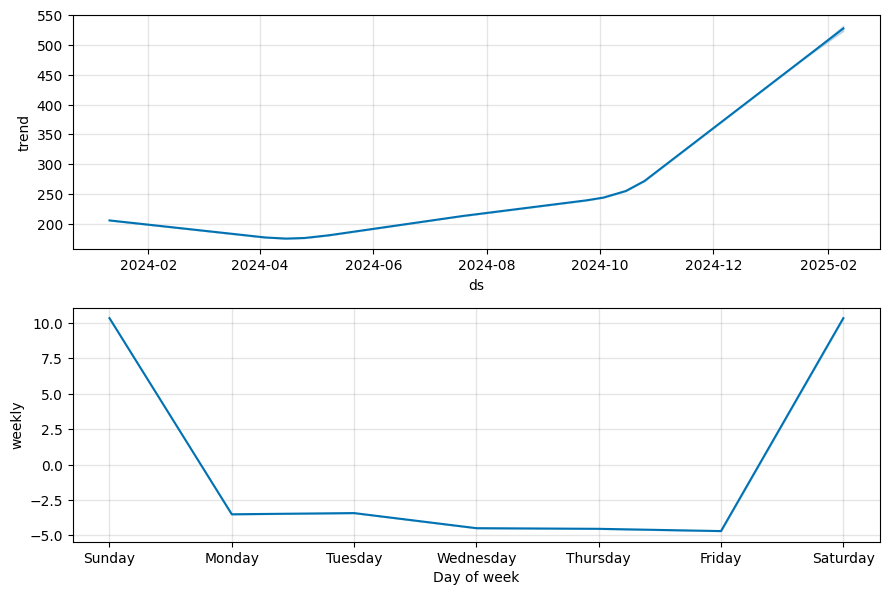

In [25]:
figure2 = n.plot_components(forecast)

In [26]:
forecast.to_csv('forecast.csv')